In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [80]:
df = pd.read_csv("C:/Users/MRIGESHA/Desktop/EXCELR/Assignments/Decision Trees/Fraud_check.csv")

In [81]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [82]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [83]:
df['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [84]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [85]:
df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [86]:
df['Undergrad'] = df['Undergrad'].astype('category')
df['Marital.Status'] = df['Marital.Status'].astype('category')
df['Urban'] = df['Urban'].astype('category')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital.Status   600 non-null    category
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    category
dtypes: category(3), int64(3)
memory usage: 16.2 KB


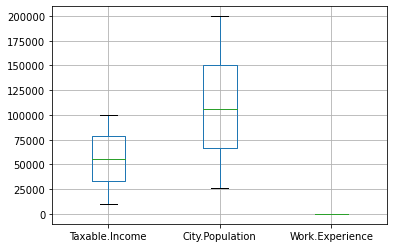

In [88]:
df.boxplot()

In [89]:
df1=pd.get_dummies(df)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [90]:
from sklearn.ensemble import IsolationForest
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df1)
# predictions
y_pred_outliers = clf.predict(df1)
df1['anomaly']=clf.predict(df1.iloc[:,:])
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,anomaly
0,68833,50047,10,1,0,0,0,1,0,1,1
1,33700,134075,18,0,1,1,0,0,0,1,1
2,36925,160205,30,1,0,0,1,0,0,1,1
3,50190,193264,15,0,1,0,0,1,0,1,1
4,81002,27533,28,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,1
596,69967,55369,2,0,1,1,0,0,0,1,1
597,47334,154058,0,1,0,1,0,0,0,1,1
598,98592,180083,17,0,1,0,1,0,1,0,1


In [91]:
df1[df1['anomaly'] ==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,anomaly
29,94033,41863,30,0,1,1,0,0,0,1,-1
34,12514,183767,1,0,1,1,0,0,0,1,-1
119,97318,47202,30,1,0,1,0,0,0,1,-1
161,93659,185596,30,0,1,0,1,0,0,1,-1
280,17783,33184,1,1,0,1,0,0,1,0,-1
541,12453,191874,30,0,1,1,0,0,0,1,-1


In [92]:
df2 = df1.drop(df1.index[[29,34,119,161,280,541]], axis = 0).reset_index()
df2

,index,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,anomaly
0,0,68833,50047,10,1,0,0,0,1,0,1,1
1,1,33700,134075,18,0,1,1,0,0,0,1,1
2,2,36925,160205,30,1,0,0,1,0,0,1,1
3,3,50190,193264,15,0,1,0,0,1,0,1,1
4,4,81002,27533,28,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
589,595,76340,39492,7,0,1,1,0,0,0,1,1
590,596,69967,55369,2,0,1,1,0,0,0,1,1
591,597,47334,154058,0,1,0,1,0,0,0,1,1
592,598,98592,180083,17,0,1,0,1,0,1,0,1


In [93]:
taxable_income = []
for value in df2["Taxable.Income"]:
    if value<=30000:
        taxable_income.append("risky")
    else:
        taxable_income.append("good")
        
df2["taxable_income"]= taxable_income
df2

,index,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,anomaly,taxable_income
0,0,68833,50047,10,1,0,0,0,1,0,1,1,good
1,1,33700,134075,18,0,1,1,0,0,0,1,1,good
2,2,36925,160205,30,1,0,0,1,0,0,1,1,good
3,3,50190,193264,15,0,1,0,0,1,0,1,1,good
4,4,81002,27533,28,1,0,0,1,0,1,0,1,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,595,76340,39492,7,0,1,1,0,0,0,1,1,good
590,596,69967,55369,2,0,1,1,0,0,0,1,1,good
591,597,47334,154058,0,1,0,1,0,0,0,1,1,good
592,598,98592,180083,17,0,1,0,1,0,1,0,1,good


In [94]:
x=df2.drop(['index','Taxable.Income','taxable_income','anomaly'],axis=1)
y=df2['taxable_income']

In [95]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
589,39492,7,0,1,1,0,0,0,1
590,55369,2,0,1,1,0,0,0,1
591,154058,0,1,0,1,0,0,0,1
592,180083,17,0,1,0,1,0,1,0


In [96]:
y

0      good
1      good
2      good
3      good
4      good
       ... 
589    good
590    good
591    good
592    good
593    good
Name: taxable_income, Length: 594, dtype: object

In [97]:
df2['taxable_income'].value_counts()

good     473
risky    121
Name: taxable_income, dtype: int64

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [115]:
x_train

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
508,140400,10,1,0,1,0,0,1,0
163,194381,25,1,0,0,1,0,1,0
316,84215,6,1,0,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
237,31377,18,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
440,128451,12,1,0,1,0,0,1,0
165,76933,6,0,1,0,0,1,0,1
7,131253,3,0,1,0,0,1,0,1
219,192297,17,0,1,0,1,0,0,1


In [100]:
# Decision Tree C5.0
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

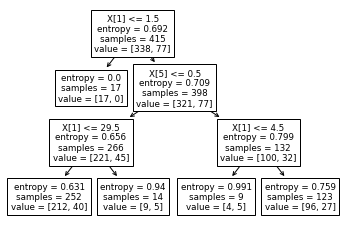

In [101]:
#PLot the decision tree
tree.plot_tree(model);

In [106]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

good     174
risky      5
dtype: int64

In [107]:
pd.crosstab(y_test,preds)

col_0,good,risky
taxable_income,,
good,131,4
risky,43,1


In [108]:
#accuracy
np.mean(preds==y_test)

0.7374301675977654

In [109]:
# Decision Tree CART
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)

In [110]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [111]:
pred_gini = model_gini.predict(x_test)
pred_gini

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
      

In [119]:
np.mean(pred_gini==y_test)

0.7486033519553073